# Lotka-Volterra examples

This notebook shows how to solve the following system:

\begin{equation}
\begin{aligned}
u_{t} &=D_{u} u_{x x}+f(u, v) \\
v_{t} &=D_{v} v_{x x}+g(u, v)
\end{aligned}
\end{equation}

in which $u$ is the prey and $v$ the predator, $D_u$ and $D_v$ are the diffusive coefficients, and $f(u, v)$ and $g(u, v)$ are the reactive terms that can have the following form:

\begin{equation}
\begin{array}{c}
f(u, v)=r u-a u v \\
g(u, v)=b a u v-m v
\end{array}
\end{equation}

with the constants $r, a, b, m > 0$.

1D and 2D cases are shown below.

## 1D case

In [1]:
from pde import (PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid, 
                 CartesianGrid, MemoryStorage)
from pde import ExplicitSolver, ImplicitSolver, Controller, ScipySolver

# Species diffusivity coefficients (please be careful with this values)
Du = 1e-6
Dv = 1e-4  # predator assumed to be faster than prey

# Rate coefficients
r = 0.15
a = 0.2
b = 1.02  # Let's predator population increases when they prey because life is not easy
m = 0.05

# Functional response
f_function = f"+ {r} * u - {a} * u * v"  # don't forget to put + (or -) sign in the beginning
g_function = f"+ {b} * {a} * u * v - {m} * v"

# (Dirichlet) Boundary condition example
bc_left = {"value": 0.0}  # both unknowns are set to zero, unfortunately
bc_right = {"value": 0.0}
bc = [bc_left, bc_right]

# Definition of PDE system
eq = PDE(
    {
        "u": f"{Du} * laplace(u)" + f_function,
        "v": f"{Dv} * laplace(v)" + g_function,
    },
    bc=bc  # comment here if you want to "free" the boundaries
)

# Defining the mesh
num_points_in_x = 100
grid = CartesianGrid(bounds=[[0, 1]], shape=num_points_in_x)

# Initialize state (Initial Conditions)
u = ScalarField.from_expression(grid, "sin(pi * x)", label="Prey")
# v = ScalarField.from_expression(grid, "abs(sin(2 * pi * x))", label="Predator")
v = ScalarField.from_expression(grid, "0.1", label="Predator")
# v = ScalarField(grid, 0.1, label="Predator")
state = FieldCollection([u, v])  # state vector

# Define time tracker to plot and animate
x_axis_limits = (0, 1)
y_axis_limits = (0, 3.5)
tracker_plot_config = PlotTracker(show=True, plot_args={
        'ax_style': {'xlim': x_axis_limits, 'ylim': y_axis_limits},
    }
)
storage = MemoryStorage()
trackers = [
    "progress",  # show progress bar during simulation
    "steady_state",  # abort if steady state is reached
    storage.tracker(interval=1),  # store data every simulation time unit
    tracker_plot_config,  # show images during simulation
]

# Setup explicit solver
# explicit_solver = ExplicitSolver(eq)
# controller = Controller(explicit_solver, t_range=[0, 100], tracker=trackers)
# solve = controller.run(state, dt=1e-2)

# Setup scipy solver
scipy_solver = ScipySolver(eq, method='LSODA')
controller = Controller(scipy_solver, t_range=[0, 100], tracker=trackers)
solve = controller.run(state, dt=1e-2)

Output()

Spent more time on handling trackers (73.93515296899997) than on the actual simulation (2.132480181000024)


In [2]:
u_storage = storage.extract_field(0)
v_storage = storage.extract_field(1)

u_storage.data

[array([0.01570732, 0.04710645, 0.0784591 , 0.10973431, 0.14090123,
        0.1719291 , 0.2027873 , 0.23344536, 0.26387305, 0.29404033,
        0.32391742, 0.35347484, 0.38268343, 0.41151436, 0.43993917,
        0.46792981, 0.49545867, 0.52249856, 0.54902282, 0.57500525,
        0.60042023, 0.62524266, 0.64944805, 0.67301251, 0.6959128 ,
        0.7181263 , 0.73963109, 0.76040597, 0.78043041, 0.79968466,
        0.81814972, 0.83580736, 0.85264016, 0.86863151, 0.88376563,
        0.89802758, 0.91140328, 0.92387953, 0.93544403, 0.94608536,
        0.95579301, 0.96455742, 0.97236992, 0.97922281, 0.98510933,
        0.99002366, 0.99396096, 0.99691733, 0.99888987, 0.99987663,
        0.99987663, 0.99888987, 0.99691733, 0.99396096, 0.99002366,
        0.98510933, 0.97922281, 0.97236992, 0.96455742, 0.95579301,
        0.94608536, 0.93544403, 0.92387953, 0.91140328, 0.89802758,
        0.88376563, 0.86863151, 0.85264016, 0.83580736, 0.81814972,
        0.79968466, 0.78043041, 0.76040597, 0.73

In [3]:
import numpy as np
t_recorded = storage.times  # retrieve all recorded simulation times
x_idx = 30
u_storage_array = np.array(u_storage.data)  # convert list of arrays to a 2D array (to use 2D index)
u_at_given_x = u_storage_array[:, x_idx]  # [t_idx, x_idx], retrieve all times (:) for a given x_idx
u_at_given_x

array([8.18149717e-01, 9.30518207e-01, 1.05493232e+00, 1.19070606e+00,
       1.33566178e+00, 1.48511000e+00, 1.63046235e+00, 1.75716082e+00,
       1.84315292e+00, 1.85886159e+00, 1.77527277e+00, 1.58032261e+00,
       1.29651255e+00, 9.80640273e-01, 6.92679150e-01, 4.66584471e-01,
       3.06438313e-01, 1.99813480e-01, 1.30947396e-01, 8.69454508e-02,
       5.87627101e-02, 4.05192379e-02, 2.85386667e-02, 2.05377011e-02,
       1.50990757e-02, 1.13344957e-02, 8.68382898e-03, 6.78313307e-03,
       5.39892058e-03, 4.37583534e-03, 3.60765062e-03, 3.02357665e-03,
       2.57416968e-03, 2.22450138e-03, 1.95022133e-03, 1.73276732e-03,
       1.55955250e-03, 1.42124764e-03, 1.31023867e-03, 1.22155119e-03,
       1.15090013e-03, 1.09550173e-03, 1.05285674e-03, 1.02107261e-03,
       9.98991052e-04, 9.85483416e-04, 9.79909551e-04, 9.81711160e-04,
       9.90569107e-04, 1.00632650e-03, 1.02897687e-03, 1.05863230e-03,
       1.09557283e-03, 1.14012315e-03, 1.19279011e-03, 1.25425003e-03,
      

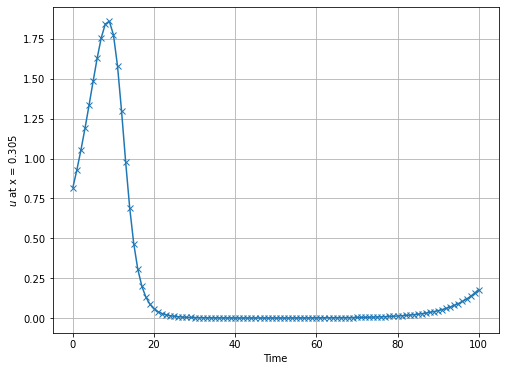

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(t_recorded, u_at_given_x, "-x")
plt.xlabel("Time")
plt.ylabel(fr"$u$ at x = {u_storage.grid.axes_coords[0][x_idx]}")
plt.grid()
plt.show()

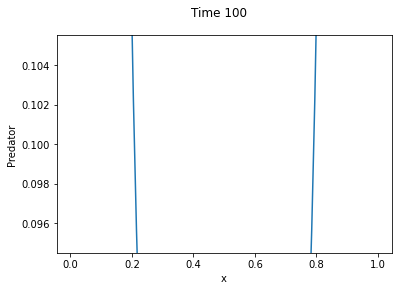

In [5]:
from pde.visualization import movie

movie(v_storage, "v_field.mp4")

## 2D case

In this case, you just have to change the definition of your grid. Everything else remains the same.

In [6]:
from pde import (PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid, 
                 CartesianGrid, MemoryStorage)
from pde import ExplicitSolver, ImplicitSolver, Controller

# Species diffusivity coefficients (please be careful with these values)
Du = 1e-6
Dv = 1e-4  # predator assumed to be faster than prey

# Rate coefficients
r = 0.15
a = 0.2
b = 1.02  # Let's predator population increases when they prey because life is not easy
m = 0.05

# Functional response
f_function = f"+ {r} * u - {a} * u * v"  # don't forget to put + (or -) sign in the beginning
g_function = f"+ {b} * {a} * u * v - {m} * v"

# (Dirichlet) Boundary condition example
bc_x = ({'value': 0}, {'value': 0})  # left right
bc_y = ({'value': 0}, {'value': 0})  # bottom top
bc = [bc_x, bc_y]

# Definition of PDE system
eq = PDE(
    {
        "u": f"{Du} * laplace(u)" + f_function,
        "v": f"{Dv} * laplace(v)" + g_function,
    },
    bc=bc
)

#################################################################
# Defining the mesh ** (HERE IS DIFFERENT COMPARED TO 1D CASE) **
num_points_in_x = 100
num_points_in_y = 100
mesh_shape = (num_points_in_x, num_points_in_y)
grid = CartesianGrid(bounds=[[0, 1], [0, 1]], shape=mesh_shape)
#################################################################

# Initialize state (Initial Conditions)
# u = ScalarField(grid, u_0, label="Prey")  # with this one you can give a value for all the domain
u = ScalarField.from_expression(grid, "sin(pi * x) * sin(pi * y)", label="Prey")
# v = ScalarField.from_expression(grid, "abs(sin(2 * pi * x) * sin(2 * pi * y))", label="Predator")
v = ScalarField(grid, 0.1, label="Predator")
state = FieldCollection([u, v])  # state vector

# Define time tracker to plot and animate
tracker_plot_config = PlotTracker(plot_args={
        "vmin": 0,  # min value in the color bar
        "vmax": 3   # max value in the color bar
    }
)
storage = MemoryStorage()
trackers = [
    "progress",  # show progress bar during simulation
    "steady_state",  # abort if steady state is reached
    storage.tracker(interval=1),  # store data every simulation time unit
    tracker_plot_config,  # show images during simulation
]

# Setup explicit solver
# explicit_solver = ExplicitSolver(eq)
# controller = Controller(explicit_solver, t_range=[0, 300], tracker=trackers)
# solve = controller.run(state, dt=1e-2)

# Setup implicit solver (if explicit does not work, try this one)
# implicit_solver = ImplicitSolver(eq)
# controller = Controller(implicit_solver, t_range=[0, 50], tracker=trackers)
# solve = controller.run(state)

# Setup scipy solver
scipy_solver = ScipySolver(eq, method='LSODA')
controller = Controller(scipy_solver, t_range=[0, 100], tracker=trackers)
solve = controller.run(state, dt=1e-2)

# print(controller.diagnostics)  # to debug

Output()

Spent more time on handling trackers (120.22794456699964) than on the actual simulation (7.217327549000359)


## Handling simulation outcomes (post-processing)

### Retrieving the grid coordinates

In [7]:
grid = storage.grid

* x-axis

In [8]:
grid.axes_coords[0]

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995])

* y-axis

In [9]:
grid.axes_coords[1]

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995])

* Both (a list of arrays)

In [10]:
grid.axes_coords

(array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
        0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
        0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
        0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
        0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
        0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
        0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
        0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
        0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
        0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
        0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
        0.995]),
 array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
        0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
        0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.2

### Retrieving the fields' values

* Field `u`

In [11]:
u_storage = storage.extract_field(0)
u_storage.data

[array([[0.00024672, 0.00073992, 0.00123238, ..., 0.00123238, 0.00073992,
         0.00024672],
        [0.00073992, 0.00221902, 0.00369593, ..., 0.00369593, 0.00221902,
         0.00073992],
        [0.00123238, 0.00369593, 0.00615583, ..., 0.00615583, 0.00369593,
         0.00123238],
        ...,
        [0.00123238, 0.00369593, 0.00615583, ..., 0.00615583, 0.00369593,
         0.00123238],
        [0.00073992, 0.00221902, 0.00369593, ..., 0.00369593, 0.00221902,
         0.00073992],
        [0.00024672, 0.00073992, 0.00123238, ..., 0.00123238, 0.00073992,
         0.00024672]]),
 array([[0.00028488, 0.0008516 , 0.00141731, ..., 0.00141731, 0.0008516 ,
         0.00028488],
        [0.0008516 , 0.00253901, 0.00422245, ..., 0.00422245, 0.00253901,
         0.0008516 ],
        [0.00141731, 0.00422245, 0.00702035, ..., 0.00702035, 0.00422245,
         0.00141731],
        ...,
        [0.00141731, 0.00422245, 0.00702035, ..., 0.00702035, 0.00422245,
         0.00141731],
        [0.0

* Field `v`

In [12]:
v_storage = storage.extract_field(1)
v_storage.data

[array([[0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
        ...,
        [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]]),
 array([[0.0090611 , 0.02171228, 0.02719023, ..., 0.02719023, 0.02171228,
         0.0090611 ],
        [0.02171228, 0.0520055 , 0.06513747, ..., 0.06513747, 0.0520055 ,
         0.02171228],
        [0.02719023, 0.06513747, 0.0816004 , ..., 0.0816004 , 0.06513747,
         0.02719023],
        ...,
        [0.02719023, 0.06513747, 0.0816004 , ..., 0.0816004 , 0.06513747,
         0.02719023],
        [0.02171228, 0.0520055 , 0.06513747, ..., 0.06513747, 0.0520055 ,
         0.02171228],
        [0.0090611 , 0.02171228, 0.02719023, ..., 0.02719023, 0.02171228,
         0.0090611 ]]),
 array([[0.00388416, 0.01059537, 0.01501755, ..., 0.01501755, 0.01059537,
         0.00388416],
        [0.01059537, 0.02890

In [13]:
len(v_storage.data)

101

In [14]:
v_storage.data[0]

array([[0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])

### Solution at a given time index

It can be simply accessed by the index value. Suppose we want time `12` of the simulation (note that this is not the simulation time) for `u` field. We can do:

In [15]:
u_storage.data[12]

array([[0.00147068, 0.00436667, 0.00722459, ..., 0.00722459, 0.00436667,
        0.00147068],
       [0.00436667, 0.01284223, 0.02109187, ..., 0.02109187, 0.01284223,
        0.00436667],
       [0.00722459, 0.02109187, 0.03443041, ..., 0.03443041, 0.02109187,
        0.00722459],
       ...,
       [0.00722459, 0.02109187, 0.03443041, ..., 0.03443041, 0.02109187,
        0.00722459],
       [0.00436667, 0.01284223, 0.02109187, ..., 0.02109187, 0.01284223,
        0.00436667],
       [0.00147068, 0.00436667, 0.00722459, ..., 0.00722459, 0.00436667,
        0.00147068]])

Thus, `u_storage.data` is a list indexed by the time. So, `u_storage.data[t_idx]` returns a 2D array (for the 2D problem) containing the solution at time index `t_idx`.

### Solution at a given time

To retrieve the solution at a given time, you must know the discrete time points beforehand. For instance, let's consider the 2D LV simulation as before. We know that $t = [0, 100]$ with `storage.tracker(interval=1)`. It means that the simulation result is recorded with simulation time interval of 1. So we have the solution for times $1, 2, 3, \ldots, 100$. However, note that **this is not** the time increment in the simulation, which is configured in `solve = controller.run(state, dt=1e-2)`. Hence, $\Delta t = 0.01$. To have a more interesting case, let us run the simulation with a different setup.

In [16]:
tracker_plot_config = PlotTracker(plot_args={
        "vmin": 0,  # min value in the color bar
        "vmax": 3   # max value in the color bar
    }
)
storage = MemoryStorage()
trackers = [
    "progress",
    "steady_state",
    storage.tracker(interval=0.5),  # note that we are changing this config parameter
    tracker_plot_config,
]

# Setup scipy solver
scipy_solver = ScipySolver(eq, method='LSODA')
controller = Controller(scipy_solver, t_range=[0, 100], tracker=trackers)
solve = controller.run(state, dt=1e-2)

Output()

Spent more time on handling trackers (121.05586883799992) than on the actual simulation (9.359765396000057)


In [17]:
u_storage = storage.extract_field(0)
len(u_storage.data)

201

Thus, we have 201 recorded simulation time, the double of time records we had before. Suppose that we want the simulation at time 16.5. It can be easily calculate with $t = t_0 + t_{\text{idx}}\times \Delta_i t \to t_{\text{idx}} = \frac{(t - t_0)}{\Delta_i t}$, where $\Delta_i t$ is the time record increment. We know that $t = 16.5$, $t_0 = 0$ and $\Delta_i t = 0.5$. Thus,

In [18]:
t_0 = 0
t_desired = 16.5
deltai_t = 0.5
t_idx = int((t_desired - t_0) / deltai_t)

t_idx

33

Hence, the `u` field solution at $t = 16.5$ is

In [19]:
u_storage.data[t_idx]

array([[0.00287979, 0.00854347, 0.01411686, ..., 0.01411686, 0.00854347,
        0.00287979],
       [0.00854347, 0.02511692, 0.04118801, ..., 0.04118801, 0.02511692,
        0.00854347],
       [0.01411686, 0.04118801, 0.06708585, ..., 0.06708585, 0.04118801,
        0.01411686],
       ...,
       [0.01411686, 0.04118801, 0.06708585, ..., 0.06708585, 0.04118801,
        0.01411686],
       [0.00854347, 0.02511692, 0.04118801, ..., 0.04118801, 0.02511692,
        0.00854347],
       [0.00287979, 0.00854347, 0.01411686, ..., 0.01411686, 0.00854347,
        0.00287979]])

### Solution at a given coordinate

Suppose that, for a given time $t_i$, we want all the field `u` values at a given `x` in the `x-axis` range. This problem is quite similar to the previous one. We know the range of `x-axis`, which is defined in `grid = CartesianGrid(bounds=[[0, 1], [0, 1]], shape=mesh_shape)`, so `x_range = [0, 1]`. We also know the number of points on the `x-axis`, which we defined in `num_points_in_x = 100`. However, let's have a look of how discrete points are distribute on `x-axis`:

In [20]:
storage.grid.axes_coords[0]

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995])

Interesting... we have set that we wanted `x_range = [0, 1]` with `dx = (x_final - x_initial) / num_points_in_x`, thus `dx = 0.01`. So why we do not have `x_points = array([0.00, 0.01, 0.02, 0.03, ..., 0.98, 0.99, 1.00])`? The answer is: `py-pde` was designed following a "cell" discretization fashion, see the figure below:

![](img/discretization_cropped.svg)

It means that given an interval $[x_{min}, x_{max}]$, it will generate N points on the required axis/direction depending on your problem (and coordinate frame system). Of note, at the moment only uniform grids are supported by `py-pde`, so the cell/points spacing will be constant through its axis. Thus, if you want to retrieve the point index at a given axis, you can use:

\begin{equation}
\begin{aligned}
&x_{i} =x_{\min }+\left(i+\frac{1}{2}\right) \Delta x \text { for } i=0, \ldots, N-1 \\
&\Delta x =\frac{x_{\max }-x_{\min }}{N}
\end{aligned}
\end{equation}

Suppose we want the values of `u` field for a fixed `x_i = 0.505` and `t = 16.5`. So we can calculate the required index as:

\begin{equation}
i = \frac{x_i - x_{min}}{\Delta x} - \frac{1}{2}
\end{equation}

Hence:

In [21]:
delta_x = 0.01
x_i = 0.505
x_min = 0
i = int((x_i - x_min) / delta_x - 1 / 2)
i

50

We can check if this value is correct:

In [22]:
x_grid = storage.grid.axes_coords[0]
x_grid[i]

0.505

So, the field `u` at the required time and space is:

In [23]:
u_storage.data[t_idx][i, :]

array([0.17463765, 0.48834765, 0.75715891, 0.98468023, 1.17167167,
       1.31716632, 1.42021027, 1.481071  , 1.50191123, 1.48692833,
       1.44201115, 1.37406129, 1.29019216, 1.1970125 , 1.10012985,
       1.00391421, 0.91148618, 0.8248557 , 0.74513457, 0.67276358,
       0.60771797, 0.54967487, 0.49813969, 0.45253564, 0.41226351,
       0.37673921, 0.34541534, 0.31779211, 0.29342122, 0.27190558,
       0.25289654, 0.23608982, 0.22122106, 0.20806125, 0.19641242,
       0.18610373, 0.17698788, 0.16893805, 0.16184514, 0.15561552,
       0.15016894, 0.14543691, 0.14136123, 0.13789277, 0.13499052,
       0.13262071, 0.13075614, 0.1293757 , 0.12846386, 0.12801047,
       0.12801047, 0.12846386, 0.1293757 , 0.13075614, 0.13262071,
       0.13499052, 0.13789277, 0.14136123, 0.14543691, 0.15016894,
       0.15561552, 0.16184514, 0.16893805, 0.17698788, 0.18610373,
       0.19641242, 0.20806125, 0.22122106, 0.23608982, 0.25289654,
       0.27190558, 0.29342122, 0.31779211, 0.34541534, 0.37673

You can easily plot the values with `matplotlib`:

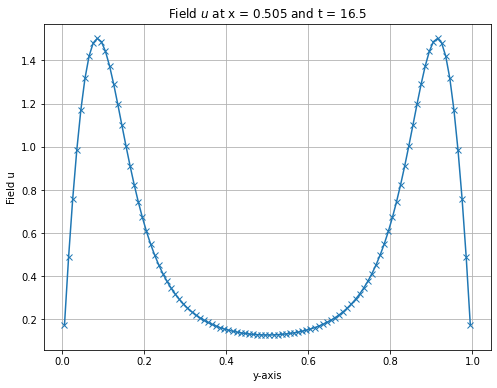

In [24]:
import matplotlib.pyplot as plt

y_grid = storage.grid.axes_coords[1]
u_solution_at_given_x = u_storage.data[t_idx][i, :]

plt.figure(figsize=(8, 6))
plt.plot(y_grid, u_solution_at_given_x, "-x")
plt.xlabel("y-axis")
plt.ylabel("Field u")
plt.title(fr"Field $u$ at x = {x_i} and t = {t_desired}")
plt.grid()
plt.show()

However, such way of generate a grid can present some inconvenience. For instance, consider the case you want the solution at `x = 0.5`. How you should discretize `x-axis`? The solution for this problem is unknown as far as I know. But... we have a workaround. Let's define the following utility function:

In [25]:
def find_idx_nearest_value_in_array(array, value):
    import numpy as np
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

With this function, we can retrieve the array index corresponding to the near array element to a given value. Let's see it in action. Suppose, again, that we want to know the index corresponding to `x = 0.5` in our grid defined on the `x-axis`. We can do now:

In [26]:
target_idx, closest_x_grid_value = find_idx_nearest_value_in_array(x_grid, 0.5)
print(f"idx = {target_idx}; closest value = {closest_x_grid_value}")

idx = 49; closest value = 0.495


With `target_idx`, we can proceed as we did before for `x = 0.505` above. A similar utility function could be implemented using Python `int` built-in function with truncation, as below:

In [27]:
def find_idx_truncanted_value_in_array(x_desired, x_min, delta):
    return int((x_desired - x_min) / delta - 1 / 2)

In [28]:
target_idx_2 = find_idx_truncanted_value_in_array(0.5, x_min, delta_x)
print(f"idx = {target_idx_2}; closest value = {x_grid[target_idx_2]}")

idx = 49; closest value = 0.495


Note that the results from such utility functions can differ with each other.